## 归纳时间信息

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 设置中文字体，防止方块
matplotlib.rcParams['font.sans-serif'] = ['Heiti TC', 'SimHei', 'Arial Unicode MS']
matplotlib.rcParams['axes.unicode_minus'] = False

# 读取数据
file_path = '/Users/elsa/Desktop/爬虫学习/0702学习/黄浦江评论.xlsx'
df = pd.read_excel(file_path)

# 去除“时间”为空的行
df = df[df['时间'].notna()]


# 折线图部分 检查是否有非常规字段
# mask = df.astype(str).apply(lambda col: col.str.contains('present', case=False, na=False))
# rows_with_present = df[mask.any(axis=1)]
# print(rows_with_present[['时间'] + list(rows_with_present.columns.difference(['时间']))])

## 热力图

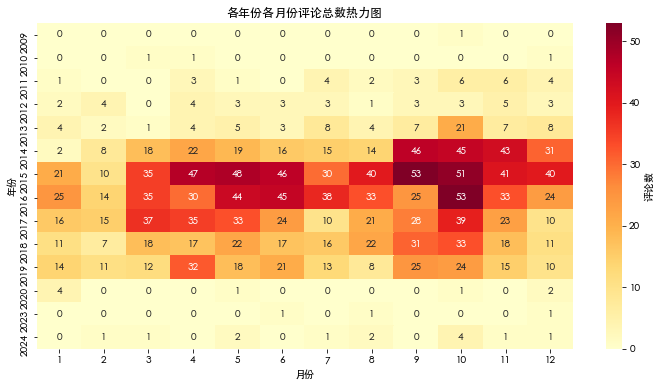

In [4]:
# 假设表头为“时间”，格式如“2024年10月”
df['年份'] = df['时间'].str.extract(r'(\d{4})年').astype(int)
df['月份'] = df['时间'].str.extract(r'(\d{1,2})月').astype(int)

# 统计每年每月评论数
pivot = df.pivot_table(index='年份', columns='月份', values='时间', aggfunc='count', fill_value=0)

# 绘制热力图
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': '评论数'})
plt.title('各年份各月份评论总数热力图')
plt.xlabel('月份')
plt.ylabel('年份')
plt.show()

## 生成折线图

<ipython-input-4-79c6ffb46751>:85: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Patch(color='black', label='冬季（12-2月）', edgecolor='black')  # 白色加边框防止看不见


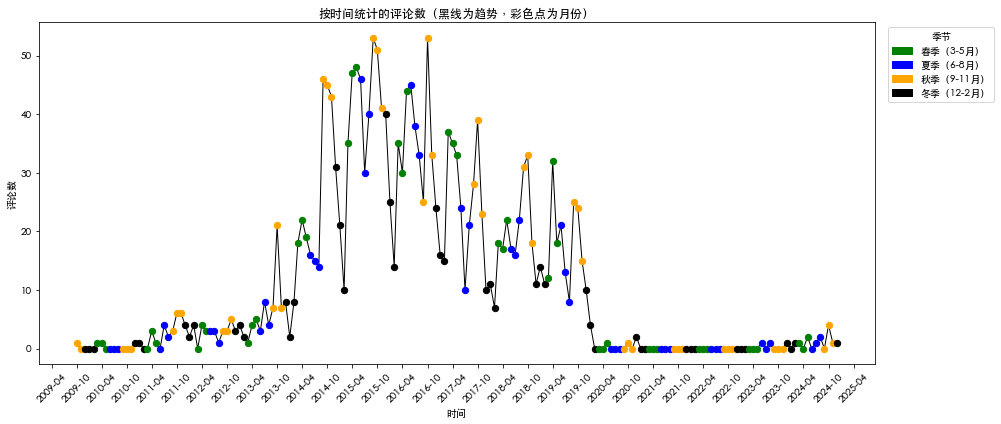

In [4]:
import matplotlib
import pandas as pd

import matplotlib.dates as mdates #使用库里有时间功能的函数
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体，防止方块
matplotlib.rcParams['font.sans-serif'] = ['Heiti TC', 'SimHei', 'Arial Unicode MS']
matplotlib.rcParams['axes.unicode_minus'] = False

# 读取数据
file_path = '/Users/elsa/Desktop/爬虫学习/原始代码/黄浦江评论.xlsx'
df = pd.read_excel(file_path)

# 转换为时间格式并清洗
df = df[df['时间'].notna()]
df['时间'] = pd.to_datetime(df['时间'], format='%Y年%m月', errors='coerce')
df['时间排序'] = df['时间'].dt.to_period('M').dt.to_timestamp()
df['年月'] = df['时间排序'].dt.strftime('%Y年%m月')
df['月份'] = df['时间排序'].dt.month

# 按年月分组统计评论数
line_data = df.groupby(['时间排序', '年月']).size().reset_index(name='评论数')
line_data = line_data.sort_values('时间排序')

# ✅ 在 line_data 准备好之后，再获取开始/结束时间
start = line_data['时间排序'].min()
end = line_data['时间排序'].max()
if pd.isna(start) or pd.isna(end):
    raise ValueError("时间排序有空值，无法生成 date_range")

# 构造完整时间轴
date_range = pd.date_range(start=start, end=end, freq='MS')
full_df = pd.DataFrame({'时间排序': date_range})
full_df['年月'] = full_df['时间排序'].dt.strftime('%Y年%m月')

# 合并评论数据，补缺为 0
plot_data = pd.merge(full_df, line_data, on=['时间排序', '年月'], how='left').fillna({'评论数': 0})
plot_data['月份'] = plot_data['时间排序'].dt.month

# 设置颜色（12个月份）
tab20_colors = plt.get_cmap('tab20').colors
month_colors = tab20_colors[:12]

# 画图
plt.figure(figsize=(14, 6))  # 只保留这一个

plt.plot(plot_data['时间排序'], plot_data['评论数'], color='black', linewidth=1)

# 定义每个月对应的颜色
season_color_map = {
    3: 'green', 4: 'green', 5: 'green',
    6: 'blue', 7: 'blue', 8: 'blue',
    9: 'orange', 10: 'orange', 11: 'orange',
    12: 'black', 1: 'black', 2: 'black'
}

# 画彩色点
for month in range(1, 13):
    month_data = plot_data[plot_data['月份'] == month]
    color = season_color_map.get(month, 'gray')
    plt.scatter(
        month_data['时间排序'],
        month_data['评论数'],
        color=color,
        label=f'{month}月',
        s=40,
        zorder=3
    )

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, fontsize=10)
plt.title('按时间统计的评论数（黑线为趋势，彩色点为月份）')
plt.xlabel('时间')
plt.ylabel('评论数')

# 自定义图例，按季节合并图例显示
from matplotlib.patches import Patch
legend_elements = [
    Patch(color='green', label='春季（3-5月）'),
    Patch(color='blue', label='夏季（6-8月）'),
    Patch(color='orange', label='秋季（9-11月）'),
    Patch(color='black', label='冬季（12-2月）', edgecolor='black')  # 白色加边框防止看不见
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.01, 1), loc='upper left', title='季节')

plt.tight_layout()
plt.show()


## 日出日落

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 时间段定义
labels = ['清晨', '上午', '下午', '傍晚', '日落', '夜晚', '深夜']
frequencies = [13, 253, 51, 153, 65, 1351, 10]
time_ranges = [
    (5, 7),      # 清晨 05:00-07:00
    (7, 12),     # 上午 07:00-12:00
    (12, 17),    # 下午 12:00-17:00
    (17, 18.5),  # 傍晚 17:00-18:30
    (18.5, 19.5),# 日落 18:30-19:30
    (19.5, 22.5),# 夜晚 19:30-22:30
    (22.5, 26),  # 深夜 22:30-02:00（26代表次日2点）
]

# 归一化半径
radii = np.array(frequencies) / max(frequencies) * 10

# 计算每个扇形的中心角和宽度
hour2theta = lambda h: (h % 24) / 24 * 2 * np.pi
thetas = []
widths = []
for start, end in time_ranges:
    center = (start + end) / 2
    width = (end - start) / 24 * 2 * np.pi
    thetas.append(hour2theta(center))
    widths.append(width)

# 颜色
colors = ['#FFFACD', '#E6F5B6', '#FFE4B5', '#FFDAB9', '#FFA07A', '#8A2BE2', '#2F4F4F']

# 绘图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)

# 画每个时间段的扇形
for i in range(len(labels)):
    ax.bar(
        thetas[i],
        radii[i],
        width=widths[i],
        bottom=0.0,
        color=colors[i],
        edgecolor='white',
        linewidth=2,
        alpha=0.9
    )
    '''
    # 标签放在扇形外
    ax.text(
        thetas[i],
        radii[i] + 1,
        labels[i],
        ha='center',
        va='center',
        fontsize=12,
        color='black'
    )
    '''

# 设置24小时刻度
hours = np.arange(0, 24, 1)
hour_labels = [f"{h}:00" for h in hours]
hour_angles = np.linspace(0, 2 * np.pi, 24, endpoint=False)
ax.set_xticks(hour_angles)
ax.set_xticklabels(hour_labels, fontsize=10)

ax.set_yticklabels([])
ax.set_title('🌅 游客提及的时间词频：模拟日出日落的时间流', va='bottom', fontsize=14)
plt.tight_layout()
plt.show()